# Question 4

## 4(a)
## Code for Shooting Method

In [5]:


import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def p(x):
    return ((2*x)/(1+x*x))

def q(x):
    return (-2/(x**2 +1))

def r(x):
    return 1;

N=20
a=0
b=4
h=(b-a)/N
u1=np.zeros(N+1)
u2=np.zeros(N+1)
v1=np.zeros(N+1)
v2=np.zeros(N+1)
u1[0]=1.25
u2[0]=0
v1[0]=0
v2[0]=1

#using the algorithm as given in the book
for i in range(0,N):
    x=a+ i*h
    k11=h*u2[i]
    k12= h*(p(x)*u2[i] + q(x)*u1[i] + r(x))
    k21=h*(u2[i] + 0.5*k12)
    k22=h*(p(x+h*0.5)*(u2[i]+ 0.5*k12) + q(x+h/2)*(u1[i]+0.5*k11)+ r(x+h/2))
    k31=h*(u2[i] + 0.5*k22)
    k32=h*(p(x+0.5*h)*(u2[i]+ 0.5*k22) + q(x+ 0.5*h)*(u1[i]+ 0.5*k21) + r(x + 0.5*h))
    k41=h*(u2[i] + k32)
    k42= h*(p(x+h)*(u2[i]+ k32)+ q(x+h)*(u1[i]+ k31)+ r(x+h))
    u1[i+1]=u1[i]+ (k11 + 2*k21 + 2*k31 + k41)/6
    u2[i+1]=u2[i] + (k12 + 2*k22 + 2*k32 + k42)/6
    k_11=h*v2[i]
    k_12=h*(p(x)*v2[i] + q(x)*v1[i])
    k_21=h*(v2[i] + 0.5*k_12)
    k_22=h*(p(x+ 0.5*h)*(v2[i]+ 0.5*k_12) + q(x + 0.5*h)*(v1[i] + 0.5*k_11))
    k_31=h*(v2[i]+ 0.5*k_22)
    k_32=h*(p(x+0.5*h)*(v2[i] + 0.5*k_22) + q(x+ h*0.5)*(v1[i] + 0.5*k_21))
    k_41=h*(v2[i] + k_32)
    k_42=h*(p(x+h)*(v2[i]+ k_32) + q(x+h)*(v1[i] + k_31))
    v1[i+1]=v1[i] + (k_11 + 2*k_21 + 2*k_31 + k_41)/6
    v2[i+1]=v2[i] + (k_12 + 2*k_22 + 2*k_32 + k_42)/6

w10= 1.25
w20= (-0.95 -u1[N])/v1[N]
y12=u1[N]
y22=v1[N]
y=np.zeros(N+1)

for i in range(0,N+1):
    y[i]=u1[i]+ ((-0.95- y12)/y22)* v1[i]

def function(x):
    z= 1 + x*x
    f= math.log(z)/math.log(math.exp(1))
    d= x*x*f
    k=1.25 + 0.486089652*x
    k=k-2.25*x*x
    k=k+2*x*np.arctan(x) -(0.5*f)
    k=k+ (.5* x*x * f)
    return k

y1=np.zeros(N+1)
x_i=np.zeros(N+1)
y1[0]=1.25
a_i=0

for i in range(0,N+1):
    x_i[i]=a_i + i*h
    y1[i]=function(x_i[i])

results = {
        'x' : x_i,
        'y(Exact)' : y1,
        'y(Shooting)' : y,
        }

df=pd.DataFrame(results)
df.set_index('x')
df['|y(Shooting)-y(Exact)|']=abs(df['y(Shooting)']-df['y(Exact)'])
df.round(10).astype(str).to_latex('Q4(a).tex')
df

,x,y(Exact),y(Shooting),|y(Shooting)-y(Exact)|
0,0.0,1.250000,1.250000,0.000000e+00
1,0.2,1.317350,1.317308,4.211493e-05
2,0.4,1.326505,1.326426,7.846705e-05
3,0.6,1.281762,1.281652,1.097406e-04
4,0.8,1.189412,1.189276,1.363002e-04
5,1.0,1.056886,1.056728,1.582707e-04
6,1.2,0.892086,0.891911,1.757448e-04
7,1.4,0.702948,0.702759,1.888420e-04
8,1.6,0.497187,0.496989,1.976936e-04
9,1.8,0.282184,0.281982,2.024216e-04


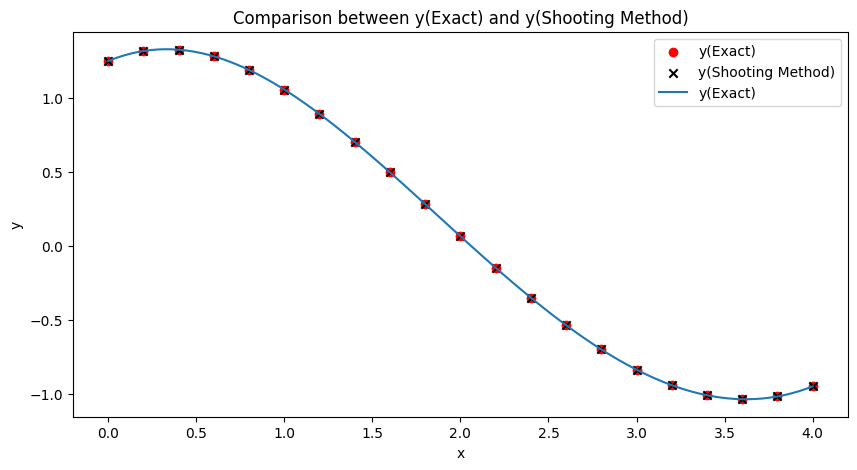

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(x_i,y1,c="red",marker="o",label="y(Exact)")
plt.scatter(x_i,y,c="black",marker="x",label="y(Shooting Method)")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison between y(Exact) and y(Shooting Method)')

plt.plot(np.linspace(0,4,100),[function(i) for i in np.linspace(0,4,100)],label="y(Exact)")
plt.legend()
plt.show()

## 4(b)
## Code for Finite Difference Method

In [7]:


import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def p(x):
    return ((2*x)/(1+x*x))

def q(x):
    return (-2/(x**2 +1))

def r(x):
    return 1;

N=19
a_i=0
b_i=4
a=np.zeros(N+1)
b=np.zeros(N+1)
c=np.zeros(N+1)
d=np.zeros(N+1)
l=np.zeros(N+1)
u=np.zeros(N+1)
z=np.zeros(N+1)
w=np.zeros(N+2)
alpha=1.25
beta=-0.95
h=(b_i-a_i)/(N+1)
x=a_i + h
f=(h*h)*q(x)
a[1]= 2 + (h*h)*q(x)
b[1]= -1 + (h/2)*p(x)
d[1]= -(h**2)*r(x) + (1 + (h/2)*p(x))*alpha

#using the algorithm as given in the book

for i in range(2,N):
    x= a_i + i*h
    a[i]=2 + (h**2)*q(x)
    b[i]=-1 + (h/2)*p(x)
    c[i]=-1 - (h/2)*p(x)
    d[i]=-(h**2)*r(x)

x= b_i - h
a[N]= 2 + (h**2)*q(x)
c[N]=-1 -(h/2)*p(x) 
d[N]= -(h**2)*r(x) + (1- (h/2)*p(x))*beta
l[1]=a[1]
u[1]=b[1]/a[1]
z[1]=d[1]/l[1]

for i in range(2,N):
    l[i]=a[i] - c[i]*u[i-1]
    u[i]=b[i]/l[i]
    z[i]=(d[i] - c[i]*z[i-1])/l[i]

l[N]=a[N]-c[N]*u[N-1]
z[N]=(d[N] - c[N]*z[N-1])/l[N]
w[0]=alpha
w[N+1]=beta
w[N]=z[N]

for i in range(N-1,-1,-1):
    if(i!=0):
        w[i]=z[i]-u[i]*w[i+1]

def function(x):
    z= 1 + x*x
    f= math.log(z)/math.log(math.exp(1))
    d= x*x*f
    k=1.25 + 0.486089652*x
    k=k-2.25*x*x
    k=k+2*x*np.arctan(x) -(0.5*f)
    k=k+ (.5* x*x * f)
    return k

y=np.zeros(N+2)
x_i=np.zeros(N+2)
y[0]=1.25

for i in range(0,N+2):
    x_i[i]=a_i + i*h
    y[i]=function(x_i[i])

results = {
        'x' : x_i,
        'y(Exact)' : y,
        'y(Finite Difference)' : w,
        }

df=pd.DataFrame(results)
df.set_index('x')
df['|y(Finite Difference)-y(Exact)|']=abs(df['y(Finite Difference)']-df['y(Exact)'])
df.round(10).astype(str).to_latex('Q4(b).tex')
df


,x,y(Exact),y(Finite Difference),|y(Finite Difference)-y(Exact)|
0,0.0,1.250000,1.250000,0.000000e+00
1,0.2,1.317350,1.314503,2.846763e-03
2,0.4,1.326505,1.320607,5.897663e-03
3,0.6,1.281762,1.272755,9.007297e-03
4,0.8,1.189412,1.177399,1.201316e-02
5,1.0,1.056886,1.042106,1.477966e-02
6,1.2,0.892086,0.874878,1.720896e-02
7,1.4,0.702948,0.683712,1.923517e-02
8,1.6,0.497187,0.476372,2.081512e-02
9,1.8,0.282184,0.260264,2.192054e-02


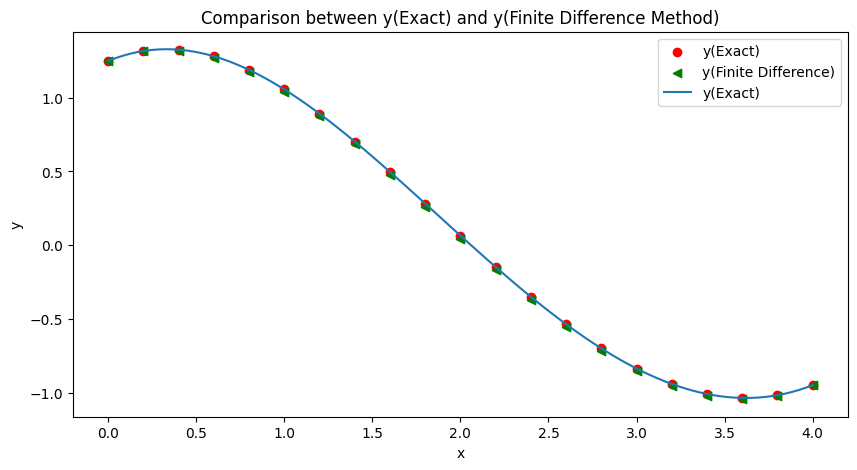

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(x_i,y,c="red",marker="o",label="y(Exact)")
plt.scatter(x_i,w,c="green",marker="<",label="y(Finite Difference)")
plt.plot(np.linspace(0,4,100),[function(i) for i in np.linspace(0,4,100)],label="y(Exact)")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison between y(Exact) and y(Finite Difference Method)')
plt.legend()

plt.show()